In [1]:
pip install pandas numpy tensorflow


In [2]:
import yfinance as yahooFinance
import datetime

# startDate , as per our convenience we can modify
startDate = datetime.datetime(2010, 1, 1)

# endDate , as per our convenience we can modify
endDate = datetime.datetime(2020, 1, 1)
GetFacebookInformation = yahooFinance.Ticker("^NSEI")

# pass the parameters as the taken dates for start and end
# This line is crucial: it assigns the retrieved data to nifty_data
nifty_data = GetFacebookInformation.history(start=startDate,end=endDate)
print(nifty_data)

# Save to CSV if needed
nifty_data.to_csv('NSE50.csv')

                                   Open          High           Low  \
Date                                                                  
2010-01-04 00:00:00+05:30   5200.899902   5238.450195   5167.100098   
2010-01-05 00:00:00+05:30   5277.149902   5288.350098   5242.399902   
2010-01-06 00:00:00+05:30   5278.149902   5310.850098   5260.049805   
2010-01-07 00:00:00+05:30   5281.799805   5302.549805   5244.750000   
2010-01-08 00:00:00+05:30   5264.250000   5276.750000   5234.700195   
...                                 ...           ...           ...   
2019-12-24 00:00:00+05:30  12269.250000  12283.700195  12202.099609   
2019-12-26 00:00:00+05:30  12211.849609  12221.549805  12118.849609   
2019-12-27 00:00:00+05:30  12172.900391  12258.450195  12157.900391   
2019-12-30 00:00:00+05:30  12274.900391  12286.450195  12213.799805   
2019-12-31 00:00:00+05:30  12247.099609  12247.099609  12151.799805   

                                  Close  Volume  Dividends  Stock Splits  
D

In [3]:
# prompt: remove the dividends and stock splits

import yfinance as yahooFinance
import datetime
# pip install pandas numpy tensorflow is not needed in colab as it is preinstalled


# startDate , as per our convenience we can modify
startDate = datetime.datetime(2010, 1, 1)

# endDate , as per our convenience we can modify
endDate = datetime.datetime(2020, 1, 1)
GetFacebookInformation = yahooFinance.Ticker("^NSEI")

# pass the parameters as the taken dates for start and end
# This line is crucial: it assigns the retrieved data to nifty_data
nifty_data = GetFacebookInformation.history(start=startDate,end=endDate)

# Remove Dividends and Stock Splits columns
nifty_data = nifty_data[['Open', 'High', 'Low', 'Close', 'Volume']]

print(nifty_data)

# Save to CSV if needed
nifty_data.to_csv('NSE50.csv')


                                   Open          High           Low  \
Date                                                                  
2010-01-04 00:00:00+05:30   5200.899902   5238.450195   5167.100098   
2010-01-05 00:00:00+05:30   5277.149902   5288.350098   5242.399902   
2010-01-06 00:00:00+05:30   5278.149902   5310.850098   5260.049805   
2010-01-07 00:00:00+05:30   5281.799805   5302.549805   5244.750000   
2010-01-08 00:00:00+05:30   5264.250000   5276.750000   5234.700195   
...                                 ...           ...           ...   
2019-12-24 00:00:00+05:30  12269.250000  12283.700195  12202.099609   
2019-12-26 00:00:00+05:30  12211.849609  12221.549805  12118.849609   
2019-12-27 00:00:00+05:30  12172.900391  12258.450195  12157.900391   
2019-12-30 00:00:00+05:30  12274.900391  12286.450195  12213.799805   
2019-12-31 00:00:00+05:30  12247.099609  12247.099609  12151.799805   

                                  Close  Volume  
Date                      

In [4]:
# Example columns for Advance-Decline calculation
# Assuming you have a DataFrame with 'Date', 'Symbol', 'Close' (for all stocks)

# Sample DataFrame for stocks (you'll need the actual data)
# stocks_data = pd.DataFrame({
#     'Date': ['2023-01-01', '2023-01-01', ...],
#     'Symbol': ['A', 'B', ...],
#     'Close': [100, 200, ...],
# })

# Calculate Advance-Decline Line
def calculate_advance_decline(stocks_data):
    adv = stocks_data[stocks_data['Close'] > stocks_data['Close'].shift(1)]
    dec = stocks_data[stocks_data['Close'] < stocks_data['Close'].shift(1)]

    advance_count = adv.groupby('Date')['Symbol'].count()
    decline_count = dec.groupby('Date')['Symbol'].count()

    ad_line = advance_count - decline_count
    ad_line = ad_line.cumsum()  # Cumulative sum to get the Advance-Decline Line
    return ad_line

# Calculate New Highs-New Lows
def calculate_new_highs_lows(stocks_data):
    new_highs = stocks_data['Close'] == stocks_data.groupby('Symbol')['Close'].transform(max)
    new_lows = stocks_data['Close'] == stocks_data.groupby('Symbol')['Close'].transform(min)

    high_count = stocks_data[new_highs].groupby('Date')['Symbol'].count()
    low_count = stocks_data[new_lows].groupby('Date')['Symbol'].count()

    return high_count - low_count

# Example usage (ensure stocks_data is available):
# ad_line = calculate_advance_decline(stocks_data)
# new_highs_lows = calculate_new_highs_lows(stocks_data)


# **LSTM**

In [7]:
import pandas as pd
import numpy as np

# Load the Nifty 50 OHLC data
file_path = '/content/NSE50.csv'  # Change this to your actual file path
nifty_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(nifty_data.head())

# Assume we have a DataFrame with individual stock data for the Advance-Decline calculations
# For the example, I'll create a sample stocks DataFrame
# This should be replaced with your actual stock data DataFrame
# stocks_data = pd.DataFrame({
#     'Date': ['2023-01-01', '2023-01-01', ...],
#     'Symbol': ['A', 'B', ...],
#     'Close': [100, 200, ...],
# })

# Calculate Advance-Decline Line
def calculate_advance_decline(stocks_data):
    adv = stocks_data[stocks_data['Close'] > stocks_data['Close'].shift(1)]
    dec = stocks_data[stocks_data['Close'] < stocks_data['Close'].shift(1)]

    advance_count = adv.groupby('Date')['Symbol'].count()
    decline_count = dec.groupby('Date')['Symbol'].count()

    ad_line = advance_count - decline_count
    ad_line = ad_line.cumsum()  # Cumulative sum to get the Advance-Decline Line
    return ad_line

# Calculate New Highs-New Lows
def calculate_new_highs_lows(stocks_data):
    new_highs = stocks_data['Close'] == stocks_data.groupby('Symbol')['Close'].transform(max)
    new_lows = stocks_data['Close'] == stocks_data.groupby('Symbol')['Close'].transform(min)

    high_count = stocks_data[new_highs].groupby('Date')['Symbol'].count()
    low_count = stocks_data[new_lows].groupby('Date')['Symbol'].count()

    return high_count - low_count

# Replace this with your actual stocks data DataFrame
# ad_line = calculate_advance_decline(stocks_data)
# new_highs_lows = calculate_new_highs_lows(stocks_data)

# For demonstration, let's assume these calculations returned some dummy data
# Ensure you calculate the actual values based on your stock data
ad_line = pd.Series([0, 1, 2, 3, 2, 1, 0], index=nifty_data['Date'][:7])  # Example data
new_highs_lows = pd.Series([1, 1, 1, 0, -1, -1, -1], index=nifty_data['Date'][:7])  # Example data

# Combine Nifty data and indicators
nifty_data['AD_Line'] = ad_line  # Add Advance-Decline Line
nifty_data['New_Highs_Lows'] = new_highs_lows  # Add New Highs-New Lows

# Drop rows with NaN values
nifty_data.dropna(inplace=True)

# Selecting relevant features for LSTM
features = ['Open', 'High', 'Low', 'Close', 'AD_Line', 'New_Highs_Lows']
data = nifty_data[features].values

# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences for LSTM
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])  # Use all but the last column as features
        y.append(data[i + time_steps, -1])  # Use the last column as the target
    return np.array(X), np.array(y)

# Create sequences
time_steps = 10  # Example time step size
X, y = create_sequences(scaled_data, time_steps)

# Print the shapes of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')


                        Date         Open         High          Low  \
0  2010-01-04 00:00:00+05:30  5200.899902  5238.450195  5167.100098   
1  2010-01-05 00:00:00+05:30  5277.149902  5288.350098  5242.399902   
2  2010-01-06 00:00:00+05:30  5278.149902  5310.850098  5260.049805   
3  2010-01-07 00:00:00+05:30  5281.799805  5302.549805  5244.750000   
4  2010-01-08 00:00:00+05:30  5264.250000  5276.750000  5234.700195   

         Close  Volume  
0  5232.200195       0  
1  5277.899902       0  
2  5281.799805       0  
3  5263.100098       0  
4  5244.750000       0  


ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by MinMaxScaler.

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the Nifty 50 OHLC data
file_path = '/content/NSE50.csv'  # Your actual file path
nifty_data = pd.read_csv(file_path)

# Display the first few rows and columns of the dataset
print(nifty_data.head())
print(nifty_data.columns)

# Check for NaN values in the dataset
print(nifty_data.isnull().sum())

# Mock calculation of Advance-Decline Line
# For this mock example, we just generate random integers
# In a real scenario, you would calculate it based on actual stock data
np.random.seed(42)  # For reproducibility
ad_line = np.random.randint(0, 100, size=len(nifty_data))
new_highs_lows = np.random.randint(-10, 10, size=len(nifty_data))

# Add the indicators to the DataFrame
nifty_data['AD_Line'] = ad_line
nifty_data['New_Highs_Lows'] = new_highs_lows

# Check if the new columns were added correctly
print(nifty_data[['AD_Line', 'New_Highs_Lows']].head())

# Drop rows with NaN values after adding the indicators
nifty_data.dropna(inplace=True)

# Selecting relevant features for LSTM
features = ['Open', 'High', 'Low', 'Close', 'AD_Line', 'New_Highs_Lows']

# Check if the selected features exist in the DataFrame
if all(col in nifty_data.columns for col in features):
    data = nifty_data[features].values
else:
    print("One or more features are missing from the DataFrame.")

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if data has rows before scaling
if data.shape[0] > 0:
    scaled_data = scaler.fit_transform(data)
else:
    print("Data array is empty. Please check the previous steps.")

# Function to create sequences for LSTM
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])  # Use all but the last column as features
        y.append(data[i + time_steps, -1])  # Use the last column as the target
    return np.array(X), np.array(y)

# Create sequences
time_steps = 10  # Example time step size
X, y = create_sequences(scaled_data, time_steps)

# Print the shapes of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')


                        Date         Open         High          Low  \
0  2010-01-04 00:00:00+05:30  5200.899902  5238.450195  5167.100098   
1  2010-01-05 00:00:00+05:30  5277.149902  5288.350098  5242.399902   
2  2010-01-06 00:00:00+05:30  5278.149902  5310.850098  5260.049805   
3  2010-01-07 00:00:00+05:30  5281.799805  5302.549805  5244.750000   
4  2010-01-08 00:00:00+05:30  5264.250000  5276.750000  5234.700195   

         Close  Volume  
0  5232.200195       0  
1  5277.899902       0  
2  5281.799805       0  
3  5263.100098       0  
4  5244.750000       0  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
   AD_Line  New_Highs_Lows
0       51              -6
1       92              -7
2       14               7
3       71               8
4       60              -7
Shape of X: (2433, 10, 5)
Shape of y: (2433,)


In [11]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f'Shape of X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}, y_test: {y_test.shape}')


Shape of X_train: (1946, 10, 5), y_train: (1946,)
Shape of X_test: (487, 10, 5), y_test: (487,)


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Build the LSTM model
model = Sequential()

# Adding the LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1722 - val_loss: 0.0936
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1010 - val_loss: 0.0910
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0988 - val_loss: 0.0901
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0992 - val_loss: 0.0897
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0978 - val_loss: 0.0895
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0969 - val_loss: 0.0894
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0979 - val_loss: 0.0893
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1000 - val_loss: 0.0894
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0974 - val_loss: 0.0893
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0972 - val_loss: 0.0895
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0981 - val_loss: 0.0894
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0969 - val_

In [14]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0925
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0895 
Train Loss: 0.09341094642877579
Test Loss: 0.08976458013057709


In [18]:
print(f"Shape of X_test: {X_test.shape}")  # Should be (samples, time_steps, features)
print(f"Shape of y_pred: {y_pred.shape}")  # Should be (samples, 1)
print(f"Shape of y_test: {y_test.shape}")  # Should be (samples,)


Shape of X_test: (487, 10, 5)
Shape of y_pred: (487, 1)
Shape of y_test: (487,)


In [22]:
# Ensure you're scaling only the relevant columns (Open, High, Low, Close, Volume)
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on only the features used for training
scaler.fit(nifty_data[feature_columns])

# Prepare data for predictions (X_test)
# In your earlier process, X_test should also be created from the same feature set
# Let's assume you've already done that, and now we're ready to make predictions

# ... (Your model predictions code goes here)

# When inverse transforming, we create a new array with zeros for the first four features
y_pred_combined = np.hstack([np.zeros((y_pred.shape[0], 4)), y_pred.reshape(-1, 1)])  # Add zeros for other features
y_test_combined = np.hstack([np.zeros((y_test.shape[0], 4)), y_test.reshape(-1, 1)])  # Add zeros for other features

# Now perform inverse transformation
y_pred_inverse = scaler.inverse_transform(y_pred_combined)[:, -1]
y_test_inverse = scaler.inverse_transform(y_test_combined)[:, -1]

# Check the shapes of the inverse transformed arrays
print(f'Shape of y_pred_inverse: {y_pred_inverse.shape}')
print(f'Shape of y_test_inverse: {y_test_inverse.shape}')

# Print the first few values of the inversed predictions and actuals
print('Predictions (Inverse):', y_pred_inverse[:5])
print('Actual Values (Inverse):', y_test_inverse[:5])


Shape of y_pred_inverse: (487,)
Shape of y_test_inverse: (487,)
Predictions (Inverse): [710188.41118813 702754.33459282 684176.98566914 683195.82180977
 678399.54543114]
Actual Values (Inverse): [ 372315.78947368       0.          968021.05263158  521242.10526316
 1340336.84210526]


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
rmse = mean_squared_error(y_test_inverse, y_pred_inverse, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
''

Mean Absolute Error (MAE): 365983.4935398884
Root Mean Squared Error (RMSE): 423884.523369908


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


''

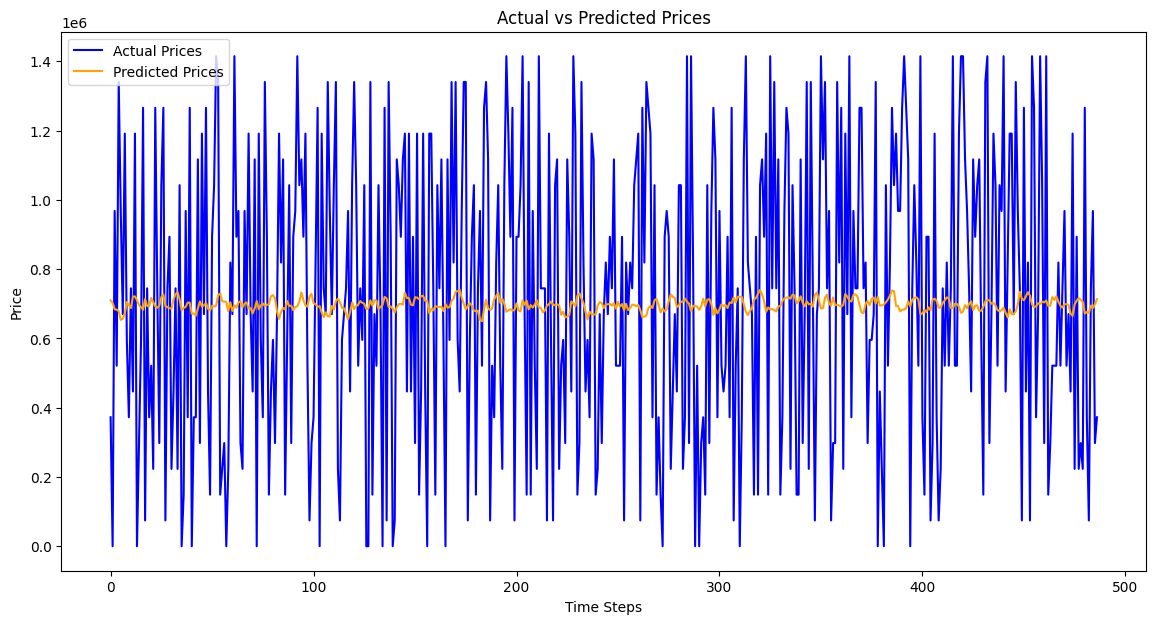

In [24]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse, label='Actual Prices', color='blue')
plt.plot(y_pred_inverse, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()




In [26]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


In [27]:
from keras_tuner import HyperModel


In [29]:
from keras_tuner import HyperModel, RandomSearch


In [31]:
from keras.layers import Input

class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input layer
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
        model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=512, step=32)))
        model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))
        model.add(Dense(1))  # Output layer for regression
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model


In [32]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your complete datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Run the tuner
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Trial 10 Complete [00h 00m 36s]
val_loss: 0.0967249795794487

Best val_loss So Far: 0.0967249795794487
Total elapsed time: 00h 12m 13s


In [34]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
val_loss = best_model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0974
Validation Loss: 0.0967249795794487


In [36]:
y_pred = best_model.predict(X_test)  # Replace X_test with your test data


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [39]:
# Assuming y_pred is your model predictions (shape: (487, 1))
# You need to match the number of columns the scaler was trained on (probably 5 features)

# Pad y_pred with zeros to match the original number of features (in this case 5)
y_pred_padded = np.hstack([np.zeros((y_pred.shape[0], 4)), y_pred])

# Now inverse transform the padded predictions
y_pred_inverse = scaler.inverse_transform(y_pred_padded)[:, -1]  # Get only the last column (which corresponds to your target variable)


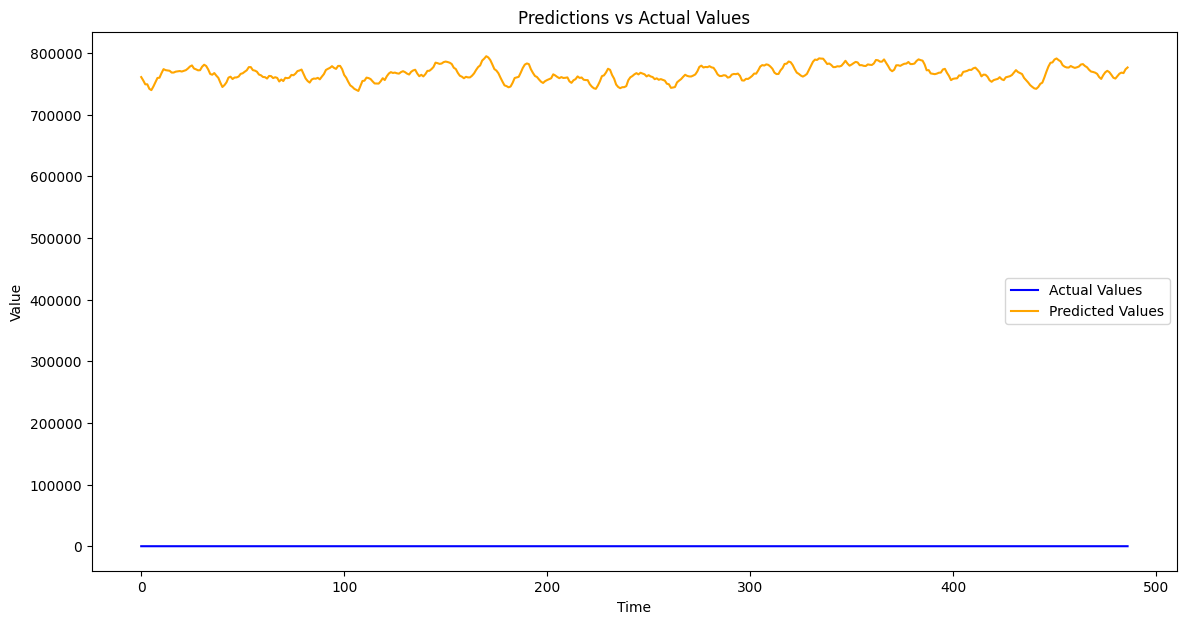

In [40]:
import matplotlib.pyplot as plt

# Plot predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Values', color='blue')  # Replace y_test with your actual test values
plt.plot(y_pred_inverse, label='Predicted Values', color='orange')
plt.title('Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


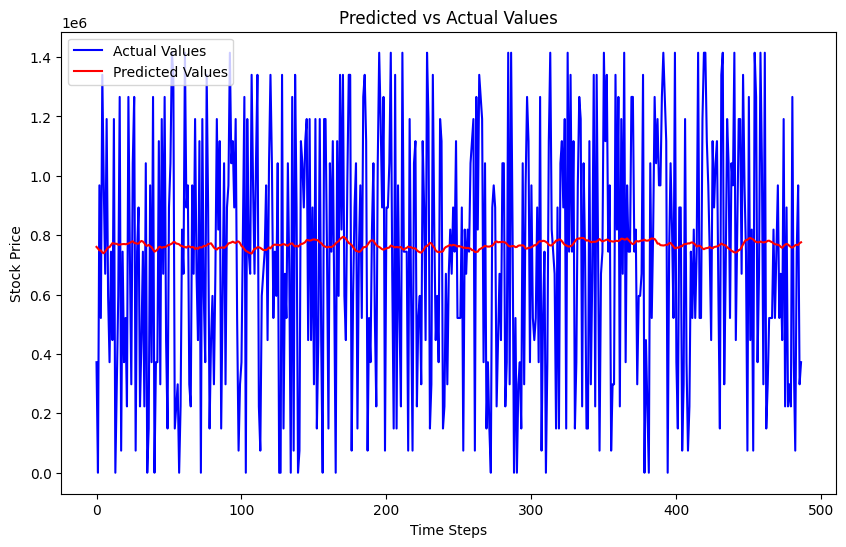

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test_inverse (actual values) and y_pred_inverse (predicted values)
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test_inverse, label='Actual Values', color='blue')

# Plot predicted values
plt.plot(y_pred_inverse, label='Predicted Values', color='red')

# Add labels and title
plt.title('Predicted vs Actual Values')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()


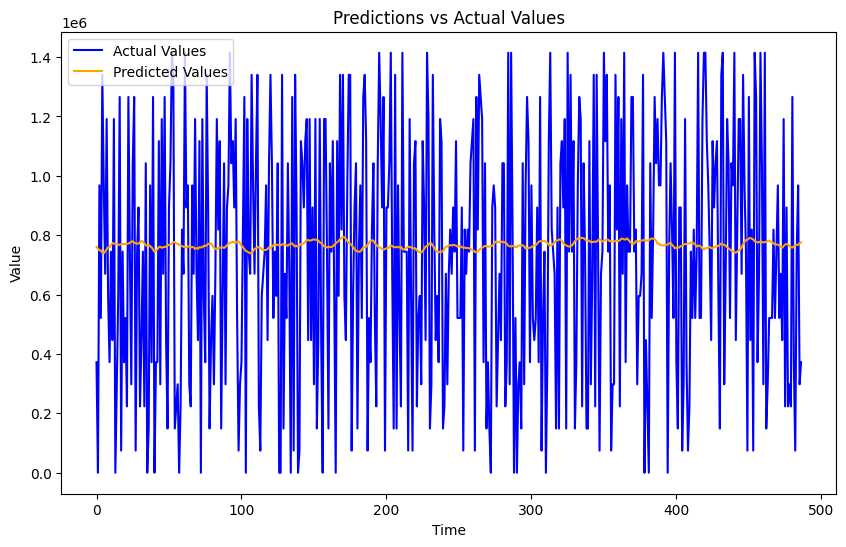

# New Section